In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.basics import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 16

In [4]:
path = Path('C:/Users/Andrew/.fastai/data')

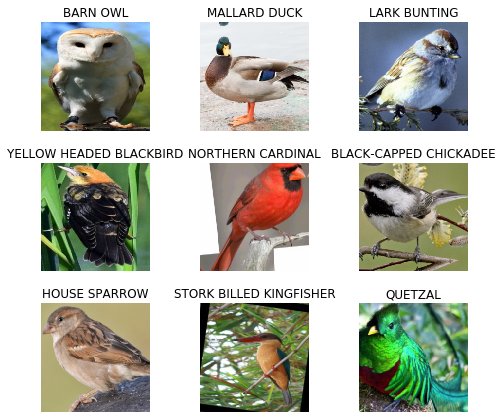

In [5]:
data = ImageDataBunch.from_folder(path/'birdies', train = 'train', valid = 'valid', ds_tfms=get_transforms(), size = 224, bs=32).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [6]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.815925,0.243921,0.072000,02:33
1,0.505728,0.169818,0.040000,02:28
2,0.249092,0.104627,0.022000,02:28
3,0.150882,0.081741,0.018000,02:28


In [8]:
learn.unfreeze()
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.581273,0.319003,0.076000,03:12
1,0.837557,0.466173,0.134000,03:11
2,0.588641,0.251169,0.060000,03:11
3,0.276229,0.117060,0.030000,03:11
4,0.123475,0.093500,0.020000,03:11
5,0.061113,0.090027,0.016000,03:11


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

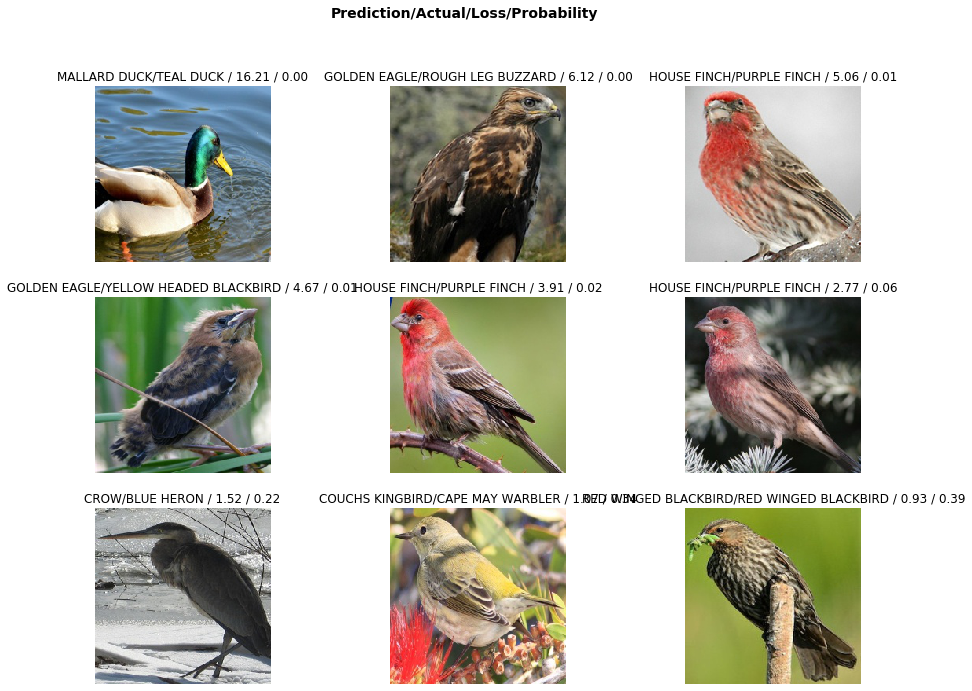

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

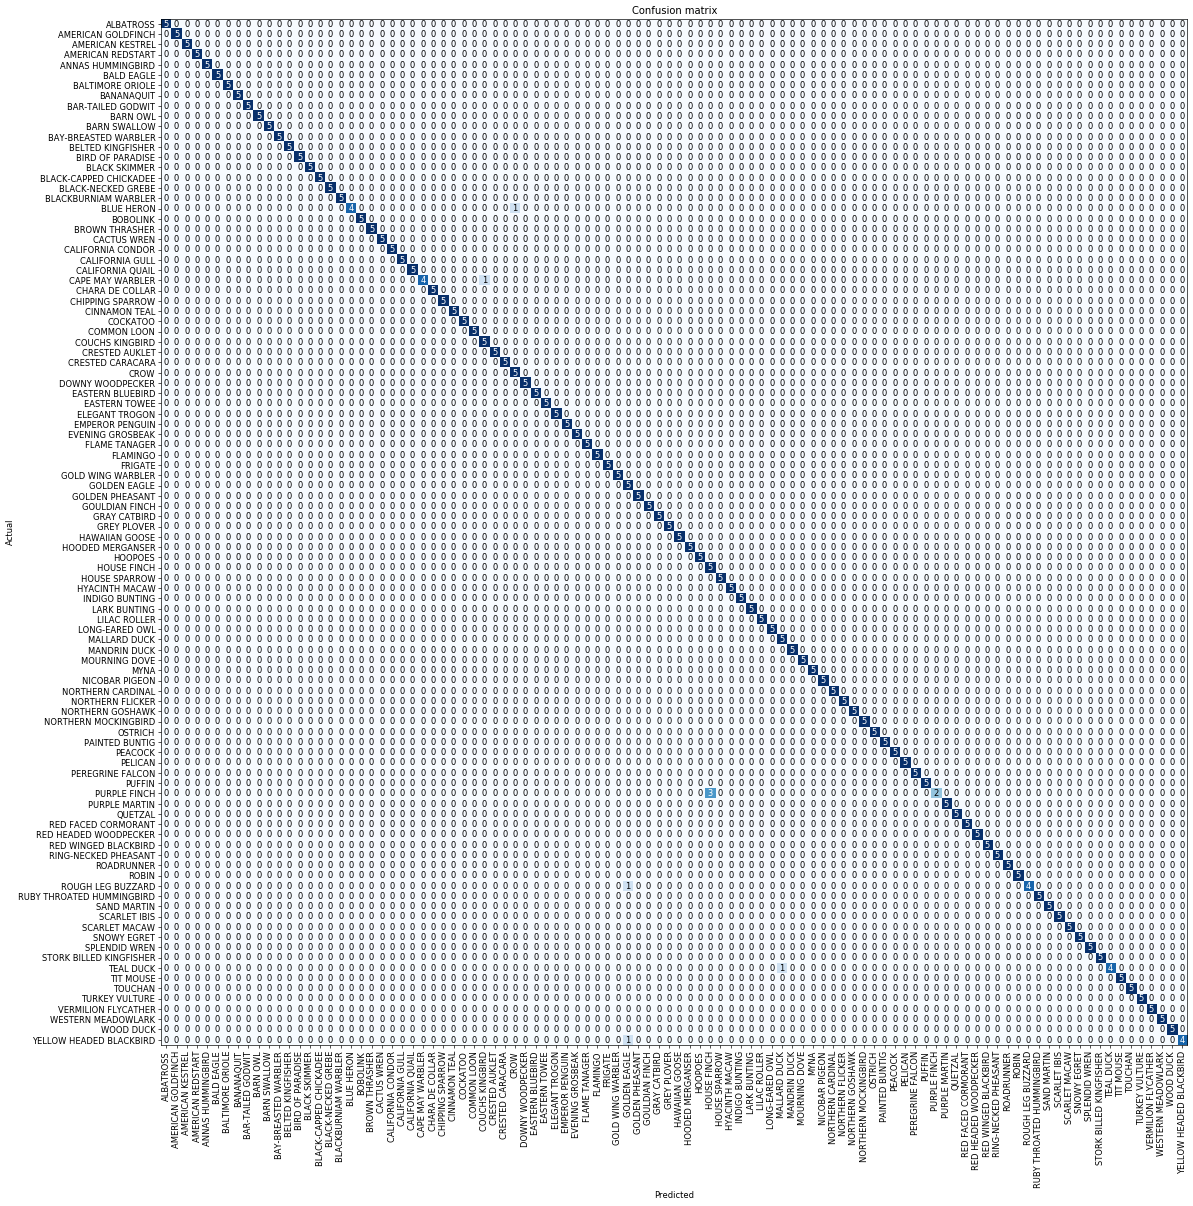

In [13]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)